<a href="https://colab.research.google.com/github/VishakhAgarwal/Cool3/blob/main/Pupil_to_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The code :
1. Checks if image is that of human face (Face should be completely visible)
2. Checks if eyes are opened
3. If face is completely visible and eyes are open, square boxes are drawn across the eyes. The square boxes identify our region of interest
4. Then we try to find the two most distinct circles within the region of interest, corresponding to iris and pupil.
5. then we finally find pupil-to-iris ratio


*Improvements need to be made to perfectly outline iris and pupil in this code.I am trying to improve the code and model, to do this.

Please add face.xml and eye.xml in the code environment before running the code.



Saving df.jpg to df (1).jpg


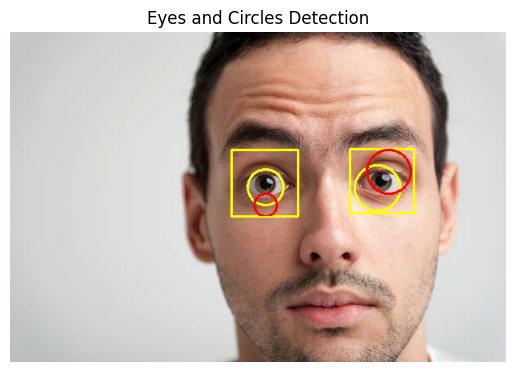

Pupil-to-Iris Ratio 1: 0.96
Pupil-to-Iris Ratio 2: 0.64


In [ ]:
import cv2
import numpy as np
from google.colab import files

uploaded = files.upload()
img = cv2.imdecode(np.frombuffer(uploaded[next(iter(uploaded))], np.uint8), -1)

# Converting to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier('face.xml')
eye_cascade = cv2.CascadeClassifier('eye.xml')

# Detect faces in the input image
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
iris_pupil_ratios = []

# Loop over the detected faces
for (x, y, w, h) in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]

    # Detecting eyes within the detected face area (roi)
    eyes = eye_cascade.detectMultiScale(roi_gray)

    # Looping over the detected eyes
    for (ex, ey, ew, eh) in eyes:
        # Drawing a yellow box around the detected eye
        cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 255), 2)

        # Extracting the region of interest (ROI) around the eye
        eye_roi_gray = roi_gray[ey:ey+eh, ex:ex+ew]
        eye_roi_color = roi_color[ey:ey+eh, ex:ex+ew]

        # Detect circles (iris and pupil) within the eye's ROI
        circles = cv2.HoughCircles(
            eye_roi_gray, cv2.HOUGH_GRADIENT, dp=1, minDist=20, param1=50, param2=30, minRadius=5, maxRadius=50)

        if circles is not None and len(circles[0]) >= 2:
            # Convert to integer coordinates and sort by radius in descending order
            circles = np.uint16(np.around(circles))
            circles = sorted(circles[0], key=lambda x: -x[2])

            # Ensure one circle is inside the other
            iris_circle = circles[0]
            pupil_circle = circles[1]

            # Calculate the ratio
            iris_radius = iris_circle[2]
            pupil_radius = pupil_circle[2]
            ratio = pupil_radius / iris_radius
            iris_pupil_ratios.append(ratio)

            # Draw the iris and pupil circles
            cv2.circle(eye_roi_color, (iris_circle[0], iris_circle[1]), iris_radius, (0, 255, 255), 2)
            cv2.circle(eye_roi_color, (pupil_circle[0], pupil_circle[1]), pupil_radius, (0, 0, 255), 2)

# Display the image with detected eyes, boxes, and circles using matplotlib
from matplotlib import pyplot as plt
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Eyes and Circles Detection')
plt.axis('off')
plt.show()

# Print the iris-pupil ratios
for i, ratio in enumerate(iris_pupil_ratios, start=1):
    print(f'Pupil-to-Iris Ratio {i}: {ratio:.2f}')


Saving thy.jpg to thy.jpg


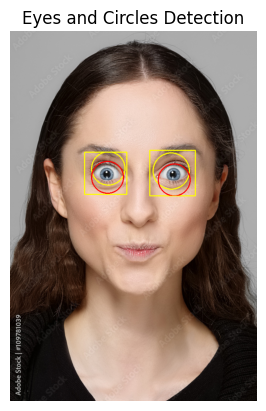

Pupil-to-Iris Ratio 1: 0.96
Pupil-to-Iris Ratio 2: 0.88


In [ ]:
import cv2
import numpy as np
from google.colab import files

uploaded = files.upload()
img = cv2.imdecode(np.frombuffer(uploaded[next(iter(uploaded))], np.uint8), -1)

# Converting to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier('face.xml')
eye_cascade = cv2.CascadeClassifier('eye.xml')

# Detect faces in the input image
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
iris_pupil_ratios = []

# Loop over the detected faces
for (x, y, w, h) in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]

    # Detecting eyes within the detected face area (roi)
    eyes = eye_cascade.detectMultiScale(roi_gray)

    # Looping over the detected eyes
    for (ex, ey, ew, eh) in eyes:
        # Drawing a yellow box around the detected eye
        cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 255), 2)

        # Extracting the region of interest (ROI) around the eye
        eye_roi_gray = roi_gray[ey:ey+eh, ex:ex+ew]
        eye_roi_color = roi_color[ey:ey+eh, ex:ex+ew]

        # Detect circles (iris and pupil) within the eye's ROI
        circles = cv2.HoughCircles(
            eye_roi_gray, cv2.HOUGH_GRADIENT, dp=1, minDist=20, param1=50, param2=30, minRadius=5, maxRadius=50)

        if circles is not None and len(circles[0]) >= 2:
            # Convert to integer coordinates and sort by radius in descending order
            circles = np.uint16(np.around(circles))
            circles = sorted(circles[0], key=lambda x: -x[2])

            # Ensure one circle is inside the other
            iris_circle = circles[0]
            pupil_circle = circles[1]

            # Calculate the ratio
            iris_radius = iris_circle[2]
            pupil_radius = pupil_circle[2]
            ratio = pupil_radius / iris_radius
            iris_pupil_ratios.append(ratio)

            # Draw the iris and pupil circles
            cv2.circle(eye_roi_color, (iris_circle[0], iris_circle[1]), iris_radius, (0, 255, 255), 2)
            cv2.circle(eye_roi_color, (pupil_circle[0], pupil_circle[1]), pupil_radius, (0, 0, 255), 2)

# Display the image with detected eyes, boxes, and circles using matplotlib
from matplotlib import pyplot as plt
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Eyes and Circles Detection')
plt.axis('off')
plt.show()

# Print the iris-pupil ratios
for i, ratio in enumerate(iris_pupil_ratios, start=1):
    print(f'Pupil-to-Iris Ratio {i}: {ratio:.2f}')
